## Set-Up the Environment

In [1]:
%load_ext autoreload
import sys
sys.path.append("../src")
from os.path import basename
import slopeTools
import plotTools
import statsTools

## Define ABF Files 

The user can list the ABF files they want to analyze

In [2]:
abfFilePaths = [
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804007.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804030.abf", 
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804043.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804048.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804060.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804066.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805008.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805029.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805035.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20811011.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20811021.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20817012.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20831011.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20831017.abf"
]

## ABF Holding Current Slope Analysis

filterSize = 15
regressionSize

In [ ]:
filterSize = 15
regressionSize = 15

Baseline slope: 0.32502655230070415 pA/min
Drug slope: -0.9313231945037843 pA/min


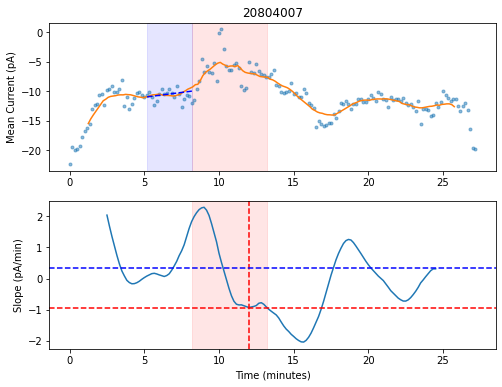

Baseline slope: -0.23585554926018965 pA/min
Drug slope: -0.4892730678830828 pA/min


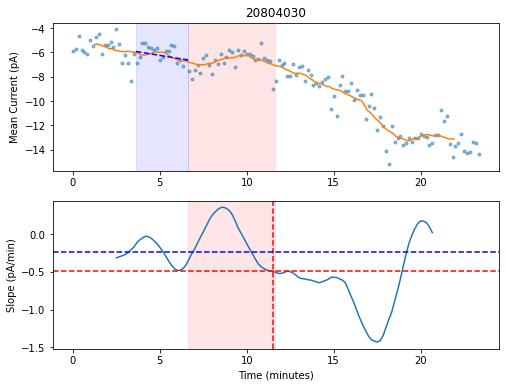

Baseline slope: 0.08388475116930504 pA/min
Drug slope: -4.6811615671430316 pA/min


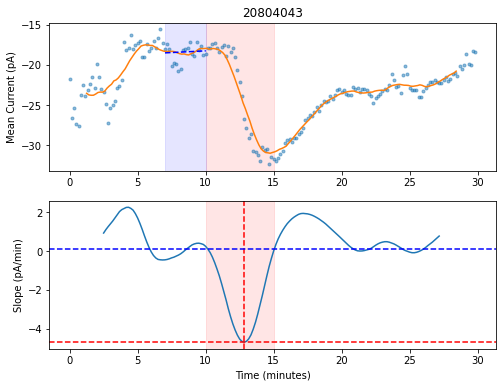

Baseline slope: -0.09856575915687961 pA/min
Drug slope: -3.830754600252423 pA/min


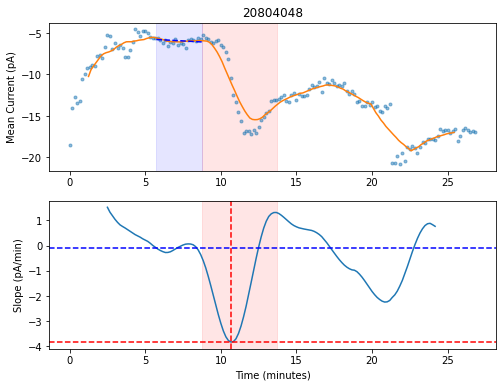

Baseline slope: -0.33711609087492284 pA/min
Drug slope: -4.273978737422398 pA/min


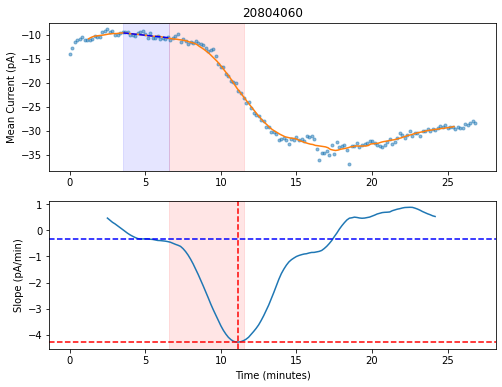

Baseline slope: -0.9762558786492598 pA/min
Drug slope: -0.35041645595005577 pA/min


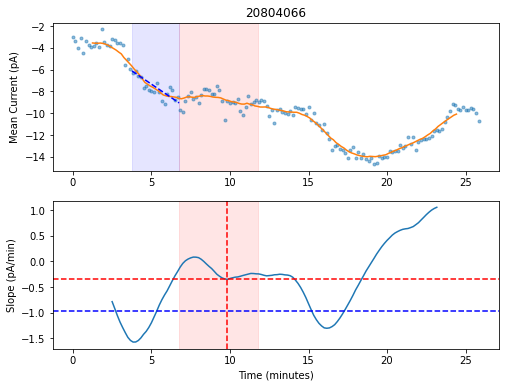

Baseline slope: 0.4804794211136666 pA/min
Drug slope: -3.8397984777178085 pA/min


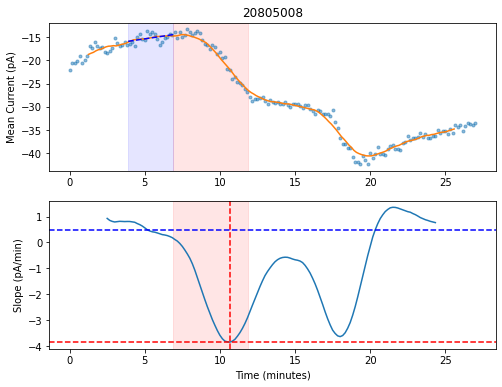

Baseline slope: 0.624871183696546 pA/min
Drug slope: -5.646211910247803 pA/min


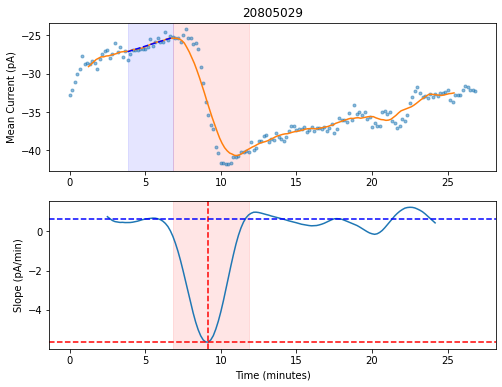

Baseline slope: -0.7064241108141447 pA/min
Drug slope: -1.8587721960885184 pA/min


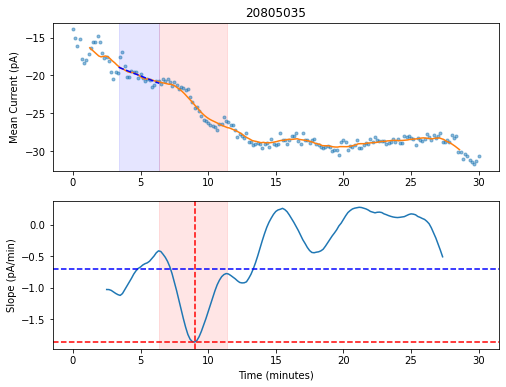

Baseline slope: -0.7428558650769685 pA/min
Drug slope: -0.8361055714743478 pA/min


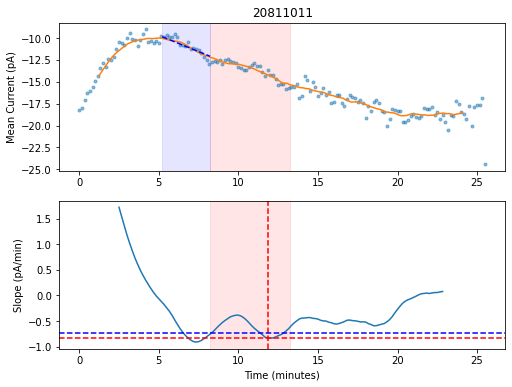

Baseline slope: -0.06801639356111226 pA/min
Drug slope: -4.059617941720146 pA/min


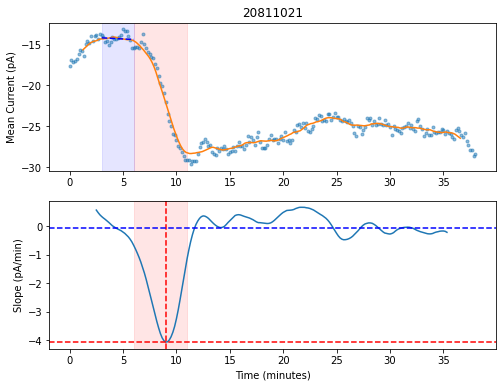

Baseline slope: 0.21817023628636417 pA/min
Drug slope: -4.376050768579755 pA/min


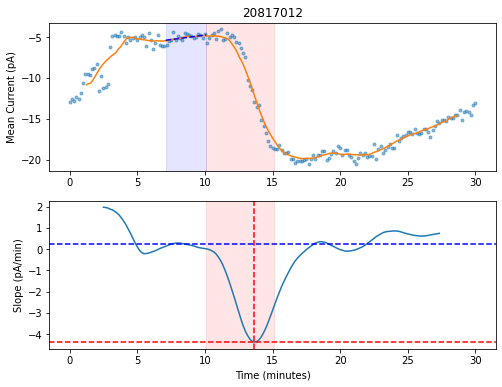

Baseline slope: -0.41043901945415295 pA/min
Drug slope: -7.777815301077707 pA/min


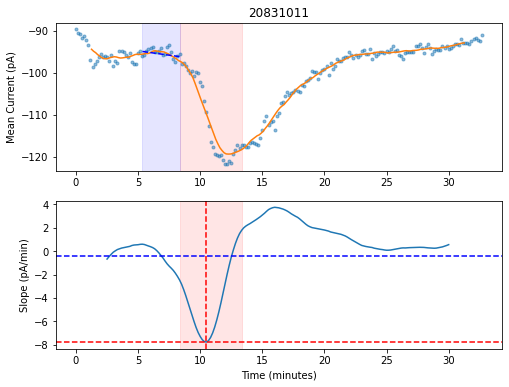

Baseline slope: 1.3637587597495637 pA/min
Drug slope: -4.022770479747227 pA/min


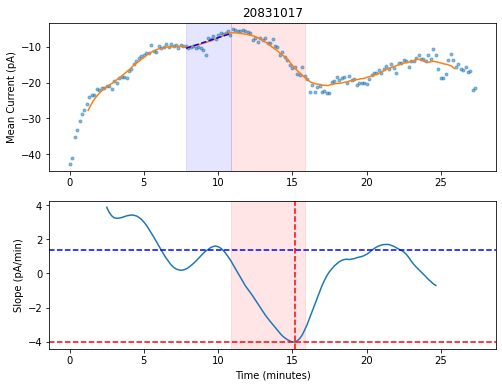

In [3]:
baselineSlopes = []
drugSlopes = []
abfIDs = []
for abfFilePath in abfFilePaths:
    baselineSlope, drugSlope = slopeTools.getBaselineAndMaxDrugSlope(abfFilePath, filterSize, regressionSize)
    baselineSlopes.append(baselineSlope)
    drugSlopes.append(drugSlope)
    abfIDs.append(basename(abfFilePath))

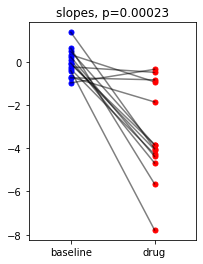

In [4]:
plotTools.plotPairs(baselineSlopes, drugSlopes, "slopes")

In [5]:
# create lists of responders and non-responders
slopeThreshold = -1.5 # peak negative slope must exceed this value to be a responder
statsTools.responderByDelta(abfIDs, baselineSlopes, drugSlopes, slopeThreshold)


Responders = 9
Non-Responders = 5
Response rate = 64.286%
Responders: 20804043.abf, 20804048.abf, 20804060.abf, 20805008.abf, 20805029.abf, 20811021.abf, 20817012.abf, 20831011.abf, 20831017.abf
Non-Responders: 20804007.abf, 20804030.abf, 20804066.abf, 20805035.abf, 20811011.abf
